In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel("Health Related Policies-Labled 1000 Records.xlsx")
df.shape

(999, 1)

In [ ]:
df.head()

,HealthPrivacyPolicy
0,HCF: This Privacy Policy covers the HCF group ...
1,central sydney private hospital: Patient Priva...
2,St Vincent’s Private Hospital Sydne: Privacy\n...
3,The Sydney Private Hospital is committed to pr...
4,Privacy Statement for Sydney Local Health Dist...


# Without preprocessing

In [ ]:
# -*- coding: utf-8 -*-
''' This program takes a excel sheet as input where each row in first column of sheet represents a document.  '''

import pandas as pd
import numpy as np


idea=df.iloc[:,0:1] #Selecting the first column that has text.

#Converting the column of data from excel sheet into a list of documents, where each document corresponds to a group of sentences.
corpus=[]
for index,row in idea.iterrows():
    corpus.append(row['HealthPrivacyPolicy'])

'''Or you could just comment out the above code and use this dummy corpus list instead if you don't have the data.
corpus=['She went to the airport to see him off.','I prefer reading to writing.','Los Angeles is in California. It's southeast of San Francisco.','I ate a burger then went to bed.','Compare your answer with Tom's.','I had hardly left home when it began to rain heavily.','If he had asked me, I would have given it to him. 
','I could have come by auto, but who would pay the fare? ','Whatever it may be, you should not have beaten him.','You should have told me yesterday','I should have joined this course last year.','Where are you going?','There are too many people here.','Everyone always asks me that.','I didn't think you were going to make it.','Be quiet while I am speaking.','I can't figure out why he said so.'] '''
    
    
#Count Vectoriser then tidf transformer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )                        

(999, 17310)


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# v = TfidfVectorizer()
# x = v.fit_transform(df['HealthPrivacyPolicy'])

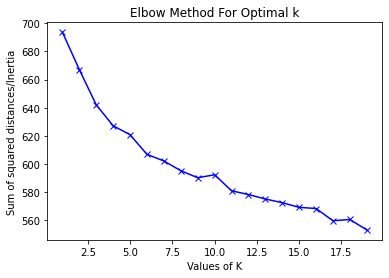

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []

K = range(1,20)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

def chooseBestKforKMeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

([<matplotlib.axis.XTick at 0x7f66c0d36a90>,
 <a list of 18 Text major ticklabel objects>)

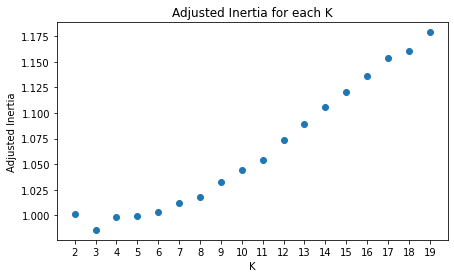

In [ ]:
# choose k range
k_range=range(2,20)
# compute adjusted intertia
best_k, results = chooseBestKforKMeans(tfidf, k_range)

# plot the results
plt.figure(figsize=(7,4))
plt.plot(results,'o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2,20,1))

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 2 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
clusters = km.labels_.tolist()

idea={'Idea':corpus, 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(idea,index=[clusters], columns=['Idea','Cluster']) # Converting it into a dataframe.

print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.



                                                 Idea  Cluster
0   HCF: This Privacy Policy covers the HCF group ...        0
1   central sydney private hospital: Patient Priva...        1
0   St Vincent’s Private Hospital Sydne: Privacy\n...        0
1   The Sydney Private Hospital is committed to pr...        1
1   Privacy Statement for Sydney Local Health Dist...        1
..                                                ...      ...
0   Why have we issued this privacy notice for our...        0
0   Privacy Policy\nGI Doctors (London) is committ...        0
0   The Evewell (which is the trading name of The ...        0
0   Privacy Notice\nThis is the Kingston Hospital ...        0
0   London Gynaecology Ltd (trading as London Colp...        0

[999 rows x 2 columns]


1    547
0    452
Name: Cluster, dtype: int64


In [ ]:
frame

,Idea,Cluster
1,HCF: This Privacy Policy covers the HCF group ...,1
4,central sydney private hospital: Patient Priva...,4
1,St Vincent’s Private Hospital Sydne: Privacy\n...,1
4,The Sydney Private Hospital is committed to pr...,4
3,Privacy Statement for Sydney Local Health Dist...,3
...,...,...
1,Why have we issued this privacy notice for our...,1
1,Privacy Policy\nGI Doctors (London) is committ...,1
1,The Evewell (which is the trading name of The ...,1
1,Privacy Notice\nThis is the Kingston Hospital ...,1


In [ ]:
frame.to_excel('test.xlsx')

# With preprocessing

In [ ]:
import re

In [ ]:
from tqdm import tqdm
lst = []
removed_urls_list = []
for text in tqdm(df['HealthPrivacyPolicy']):
    removed_urls_text = re.sub(r"http\S+", "", text)
    lst.append(removed_urls_text)

100%|██████████| 999/999 [00:00<00:00, 60065.51it/s]


In [ ]:
#remove urls from text python
removed_urls_list = []
for text in tqdm(lst):
    removed_urls_text = re.sub(r"http\S+", "", text)
    removed_urls_list.append(removed_urls_text)

100%|██████████| 999/999 [00:00<00:00, 57422.36it/s]


In [ ]:
from bs4 import BeautifulSoup
text_lst = []
for text in tqdm(removed_urls_list):
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text()
    text_lst.append(text)

100%|██████████| 999/999 [00:00<00:00, 2548.73it/s]


In [ ]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
decat_lst = []
for decat_text in tqdm(text_lst):
    text = decontracted(decat_text)
    decat_lst.append(text)

100%|██████████| 999/999 [00:00<00:00, 9313.18it/s]


In [ ]:
strip_list = []
for to_strip in tqdm(decat_lst):
    text = re.sub("\S*\d\S*", "", to_strip).strip()
    strip_list.append(text)

100%|██████████| 999/999 [00:01<00:00, 769.90it/s]


In [ ]:
spatial_list = []
for to_spatial in tqdm(strip_list):
    text = re.sub('[^A-Za-z0-9]+', ' ', to_spatial)
    spatial_list.append(text)

100%|██████████| 999/999 [00:00<00:00, 2191.41it/s]


In [ ]:
from nltk.corpus import stopwords
# Combining all the above stundents 
preprocessed_reviews = []
stopwords = stopwords.words('english')
# tqdm is for printing the status bar
for sentance in tqdm(spatial_list):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 999/999 [00:04<00:00, 210.84it/s]


In [ ]:
print(len(preprocessed_reviews))
preprocessed_reviews[0]

999


'hcf privacy policy covers hcf group companies hcf group hospitals contribution fund australia ltd hcf life insurance company pty ltd manchester unity australia ltd treytell pty limited hcf research foundation ltd committed protecting privacy handle personal information accordance privacy policy obligations privacy act cth relevant state legislation dealing privacy health records also comply spam act cth call register act cth amended time time overseas visitor health cover ovhc member european union processing personal information also subject general data protection regulation gdpr may sort personal information usually collect personal information broadly information relating identified us identified sensitive information special subset personal information includes health information purposes privacy policy references personal information includes sensitive information personal information may collect includes information relevant health life travel pet insurance cover dental optical

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
count_X = vectorizer.fit_transform(preprocessed_reviews)

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf_X = transformer.fit_transform(count_X)
print(tfidf_X.shape )     

(999, 13616)


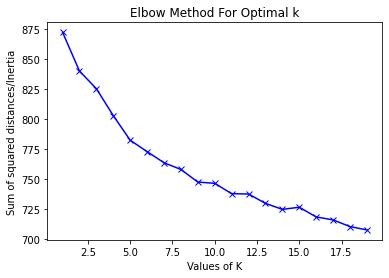

In [ ]:
Sum_of_squared_distances = []
K = range(1,20)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_X)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

def chooseBestKforKMeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

([<matplotlib.axis.XTick at 0x7f66c1f99610>,
 <a list of 18 Text major ticklabel objects>)

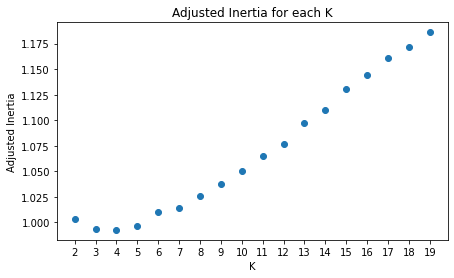

In [ ]:
# choose k range
k_range=range(2,20)
# compute adjusted intertia
best_k, results = chooseBestKforKMeans(tfidf_X, k_range)

# plot the results
plt.figure(figsize=(7,4))
plt.plot(results,'o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2,20,1))

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 2 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
clusters = km.labels_.tolist()

idea={'Idea':corpus, 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(idea,index=[clusters], columns=['Idea','Cluster']) # Converting it into a dataframe.

print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.



                                                 Idea  Cluster
1   HCF: This Privacy Policy covers the HCF group ...        1
0   central sydney private hospital: Patient Priva...        0
1   St Vincent’s Private Hospital Sydne: Privacy\n...        1
0   The Sydney Private Hospital is committed to pr...        0
0   Privacy Statement for Sydney Local Health Dist...        0
..                                                ...      ...
1   Why have we issued this privacy notice for our...        1
1   Privacy Policy\nGI Doctors (London) is committ...        1
1   The Evewell (which is the trading name of The ...        1
1   Privacy Notice\nThis is the Kingston Hospital ...        1
1   London Gynaecology Ltd (trading as London Colp...        1

[999 rows x 2 columns]


1    505
0    494
Name: Cluster, dtype: int64


In [ ]:
frame.to_excel("preprocessed-auto-labelled file.xlsx")